# Imports

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
matplotlib.rcParams['figure.figsize'] = (15, 8)

In [41]:
housing_df = pd.read_csv("./HW2_Housing_Survey.csv")
housing_df

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJUST,WGTP,NP,TYPE,...,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80
0,H,186,8,700,4,16,1015675,89,4,1,...,81,27,93,151,28,79,25,101,157,129
1,H,306,8,700,4,16,1015675,310,1,1,...,292,401,81,494,346,496,615,286,454,260
2,H,395,8,100,4,16,1015675,106,2,1,...,123,119,168,107,95,101,30,124,106,31
3,H,506,8,700,4,16,1015675,240,4,1,...,68,359,385,71,234,421,76,77,242,231
4,H,835,8,800,4,16,1015675,118,4,1,...,127,36,119,121,116,209,97,176,144,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,H,1357238,8,300,4,16,1015675,108,2,1,...,198,88,112,26,64,106,142,106,33,111
6492,H,1357340,8,400,4,16,1015675,58,2,1,...,66,101,62,52,105,75,20,127,105,68
6493,H,1357874,8,900,4,16,1015675,32,2,1,...,7,8,12,37,44,36,28,33,48,59
6494,H,1357880,8,500,4,16,1015675,123,2,1,...,201,123,38,104,186,203,132,118,201,125


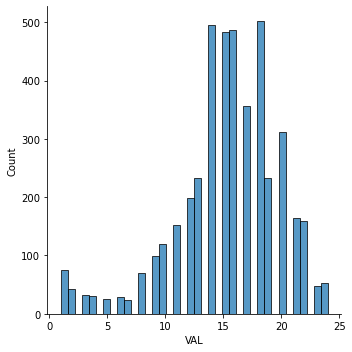

In [42]:
sns.displot(x=housing_df.VAL)

# Question 1: Properties worth more than $1,000,000

There are 53 properties worth more than $1,000,000


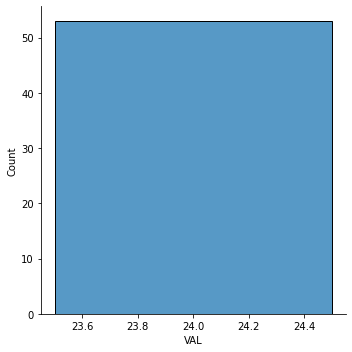

In [60]:
million_count = housing_df[housing_df["VAL"]==24].shape[0]
print(f"There are { million_count } properties worth more than $1,000,000")
sns.displot(x=housing_df[housing_df["VAL"]==24]["VAL"])

# Question 2: Average of people recorded in house

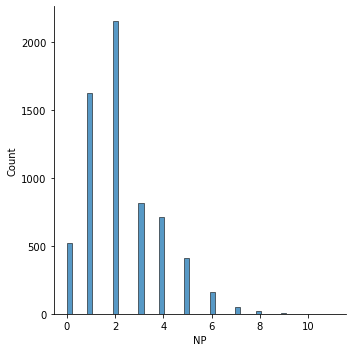

In [44]:
sns.displot(x=housing_df.NP)

In [45]:
average_recorded = housing_df["NP"].mean()
print(f"There are in average { average_recorded } persons recorded in a house")

There are in average 2.2984913793103448 persons recorded in a house


# Question 3: Property value vs Persons recorded

<AxesSubplot:xlabel='NP', ylabel='VAL'>

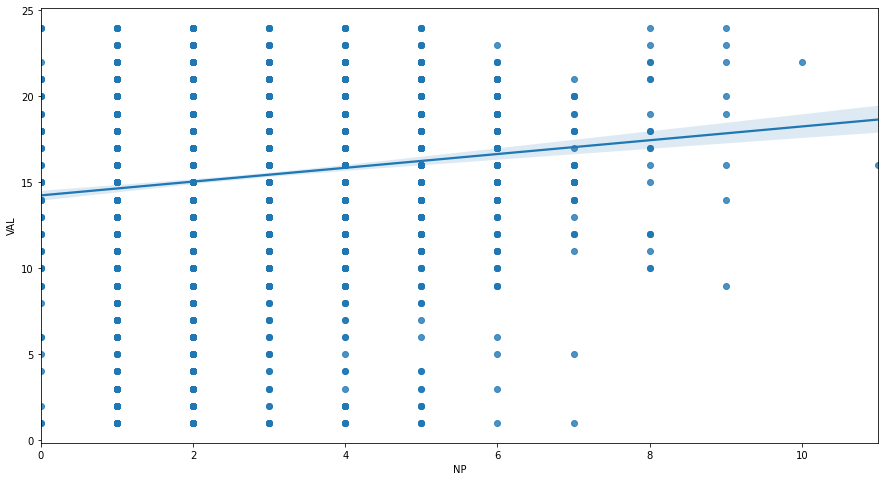

In [46]:
sns.regplot(x=housing_df.NP, y=housing_df.VAL)

# Question 4: Normalization

Unnormalized

<AxesSubplot:xlabel='FINCP', ylabel='Count'>

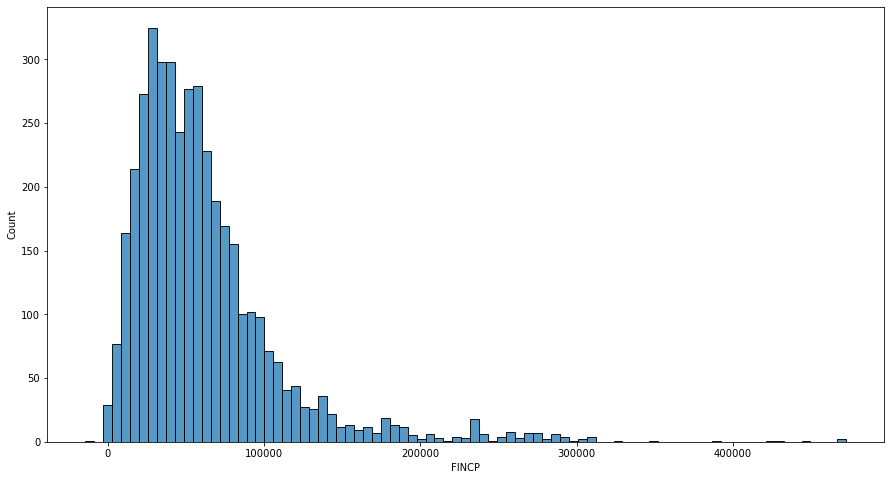

In [47]:
sns.histplot(x=housing_df.FINCP)

Normalized

<AxesSubplot:xlabel='FINCP', ylabel='Count'>

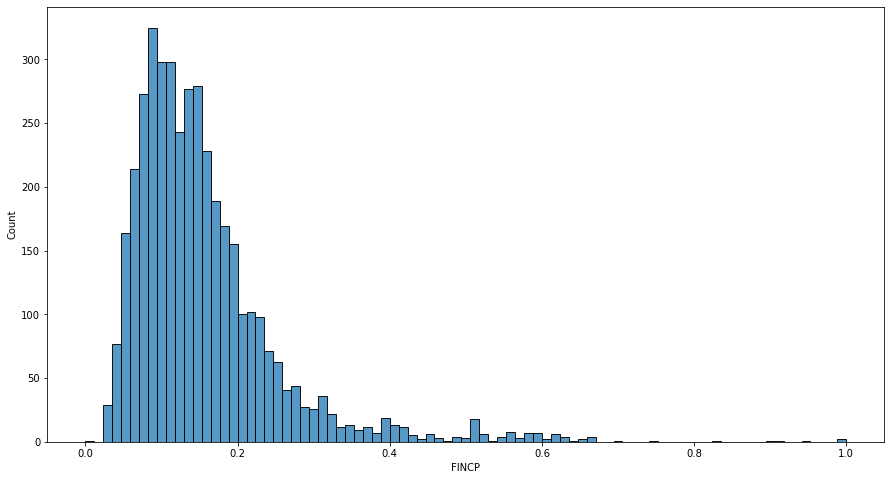

In [48]:
fin_income = housing_df.FINCP
fin_norm = (fin_income - fin_income.min())/(fin_income.max() - fin_income.min())
sns.histplot(x=fin_norm)

# Question 5: Divide into 5 bins

### Divide dataframe into quantile-based bins

In [49]:
n_bin = 5
fin_income = fin_income.sort_values()
a, bin_edges = pd.qcut(fin_income, n_bin, retbins=True)
a.value_counts()

(-14299.001, 26600.0]    812
(41500.0, 59970.0]       810
(59970.0, 84500.0]       810
(84500.0, 472600.0]      810
(26600.0, 41500.0]       809
Name: FINCP, dtype: int64

In [50]:
df_bins = []
for i in range(len(bin_edges)-1):
  if i == 0:
    fin_bin = fin_income[fin_income <= bin_edges[i+1]]
    print(f"(, {bin_edges[i+1]}] {fin_bin.shape[0]}")
  else:
    fin_bin = fin_income[(fin_income > bin_edges[i]) & (fin_income <= bin_edges[i+1])]
    print(f"({bin_edges[i]}, {bin_edges[i+1]}] {fin_bin.shape[0]}")
  df_bins.append(fin_bin)

(, 26600.0] 812
(26600.0, 41500.0] 809
(41500.0, 59970.000000000015] 810
(59970.000000000015, 84500.0] 810
(84500.0, 472600.0] 810


### Visualization

Values in each bin

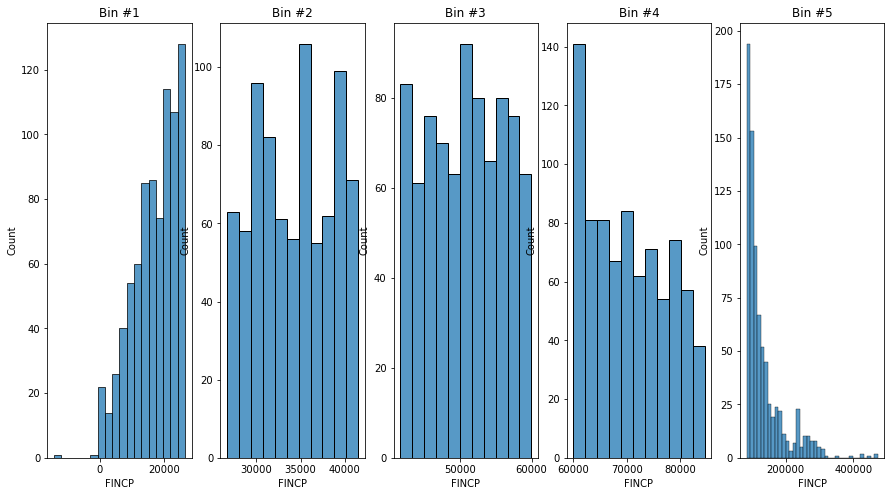

In [51]:
_, axs = plt.subplots(ncols=n_bin)
for i in range(n_bin):
  axs[i].title.set(text=f"Bin #{i+1}")
  sns.histplot(x=df_bins[i], ax=axs[i])

Element count per bin

<AxesSubplot:xlabel='BINS', ylabel='COUNT'>

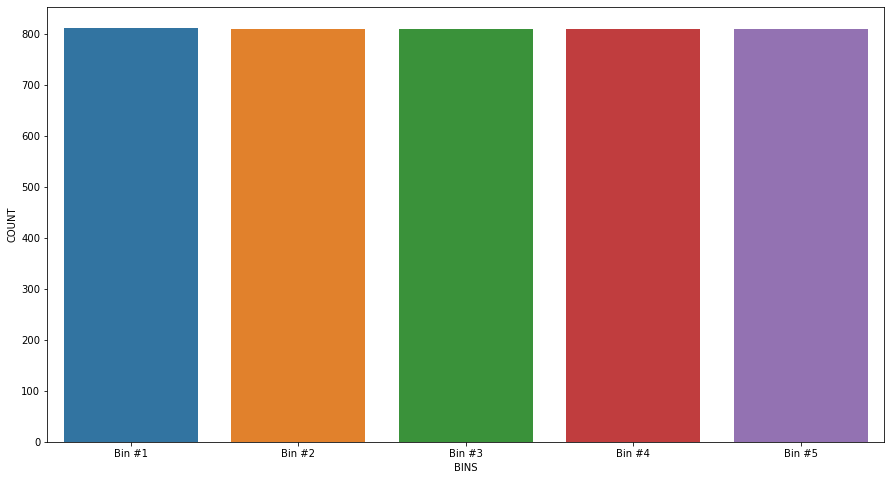

In [52]:
df_count = pd.DataFrame(map(lambda df: df.shape[0], df_bins), columns=["COUNT"])
df_count["BINS"] = [f"Bin #{i+1}" for i in range(n_bin)]
sns.barplot(x=df_count.BINS, y=df_count.COUNT)